<a href="https://colab.research.google.com/github/Prashant-op/Cardiovascular-Risk-Pridiction1/blob/main/Prashant_Bhardwaj_Capstone_Cardiovascular_Risk_Pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts.

 The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includesover 4,000 records and 15 attributes.


Variables

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.


Data Description
Demographic:

• Sex: male or female("M" or "F")


• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")


• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset initialization

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Alma Better/Cohort Nilgiri/Module 5/Week 1/Day 1/data_cardiovascular_risk.csv")

In [ ]:
data

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [ ]:
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
data.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


Now I am split our dataset in two part, train and test part

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, stratify=data['TenYearCHD'], random_state = 1)

In [ ]:
train_data.shape

(2712, 17)

In [ ]:
test_data.shape

(678, 17)

In [ ]:
train_data.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,2712.000000,2712.000000,2643.000000,2712,2712,2695.000000,2679.000000,2712.000000,2712.000000,2712.000000,2681.000000,2712.000000,2712.000000,2701.000000,2711.000000,2473.000000,2712.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1551,1367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1697.519912,49.580015,1.984487,NaN,NaN,9.078664,0.030235,0.005900,0.312684,0.024336,237.450578,132.628134,82.843658,25.842340,76.160089,82.095835,0.150811
std,978.104904,8.585428,1.031738,NaN,NaN,11.906829,0.171266,0.076597,0.463672,0.154119,45.226576,22.305003,12.085438,4.107148,12.098924,24.350248,0.357931
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,16.690000,45.000000,43.000000,0.000000
25%,854.750000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.000000,23.070000,68.000000,71.000000,0.000000
50%,1699.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,129.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2537.250000,56.250000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,265.000000,144.000000,90.000000,28.080000,83.000000,87.000000,0.000000


In [ ]:
train_data.shape

(2712, 17)

In [ ]:
pd.DataFrame(train_data.dtypes).rename(columns={0:'dtype'})

,dtype
id,int64
age,int64
education,float64
sex,object
is_smoking,object
cigsPerDay,float64
BPMeds,float64
prevalentStroke,int64
prevalentHyp,int64
diabetes,int64


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2712 entries, 542 to 682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2712 non-null   int64  
 1   age              2712 non-null   int64  
 2   education        2643 non-null   float64
 3   sex              2712 non-null   object 
 4   is_smoking       2712 non-null   object 
 5   cigsPerDay       2695 non-null   float64
 6   BPMeds           2679 non-null   float64
 7   prevalentStroke  2712 non-null   int64  
 8   prevalentHyp     2712 non-null   int64  
 9   diabetes         2712 non-null   int64  
 10  totChol          2681 non-null   float64
 11  sysBP            2712 non-null   float64
 12  diaBP            2712 non-null   float64
 13  BMI              2701 non-null   float64
 14  heartRate        2711 non-null   float64
 15  glucose          2473 non-null   float64
 16  TenYearCHD       2712 non-null   int64  
dtypes: float64(9)

In [ ]:
numerical_features=list(data.describe().columns)

len(numerical_features)

15

In [ ]:
## Correlation
# import seaborn as sns
# plt.figure(figsize=(15,8))
# correlation = train_data.corr()
# sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

# ***`Exploratory Data Analysis`***

In [ ]:
train_data.drop(['id'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2712 entries, 542 to 682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2712 non-null   int64  
 1   education        2643 non-null   float64
 2   sex              2712 non-null   object 
 3   is_smoking       2712 non-null   object 
 4   cigsPerDay       2695 non-null   float64
 5   BPMeds           2679 non-null   float64
 6   prevalentStroke  2712 non-null   int64  
 7   prevalentHyp     2712 non-null   int64  
 8   diabetes         2712 non-null   int64  
 9   totChol          2681 non-null   float64
 10  sysBP            2712 non-null   float64
 11  diaBP            2712 non-null   float64
 12  BMI              2701 non-null   float64
 13  heartRate        2711 non-null   float64
 14  glucose          2473 non-null   float64
 15  TenYearCHD       2712 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 360.2+ KB


we drop the id  and education column because there is no correlation with Heart Disease.

In [ ]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
# creating dummies for SEX and Is smoking
train_data['sex'] = data['sex'].map({'M':0, 'F':1})
train_data['is_smoking'] = train_data['is_smoking'].map({'No':0, 'Yes':1})
# the independent variables set
X=train_data[[	'age' ,'education',	'sex','is_smoking','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(15)]
vif["features"] = X.columns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


MissingDataError: ignored

# ***`Data Visualisation`***





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


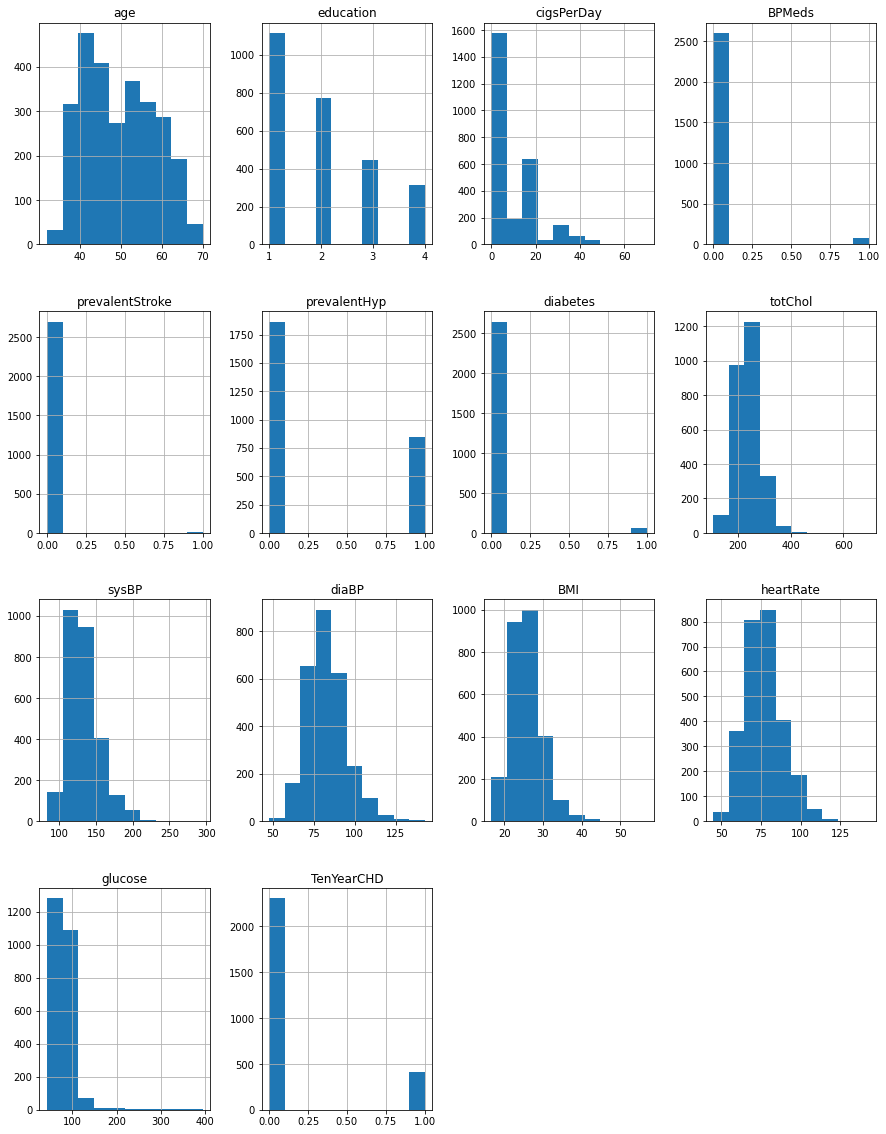

In [ ]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
train_data.hist(ax = ax)
plt.show()

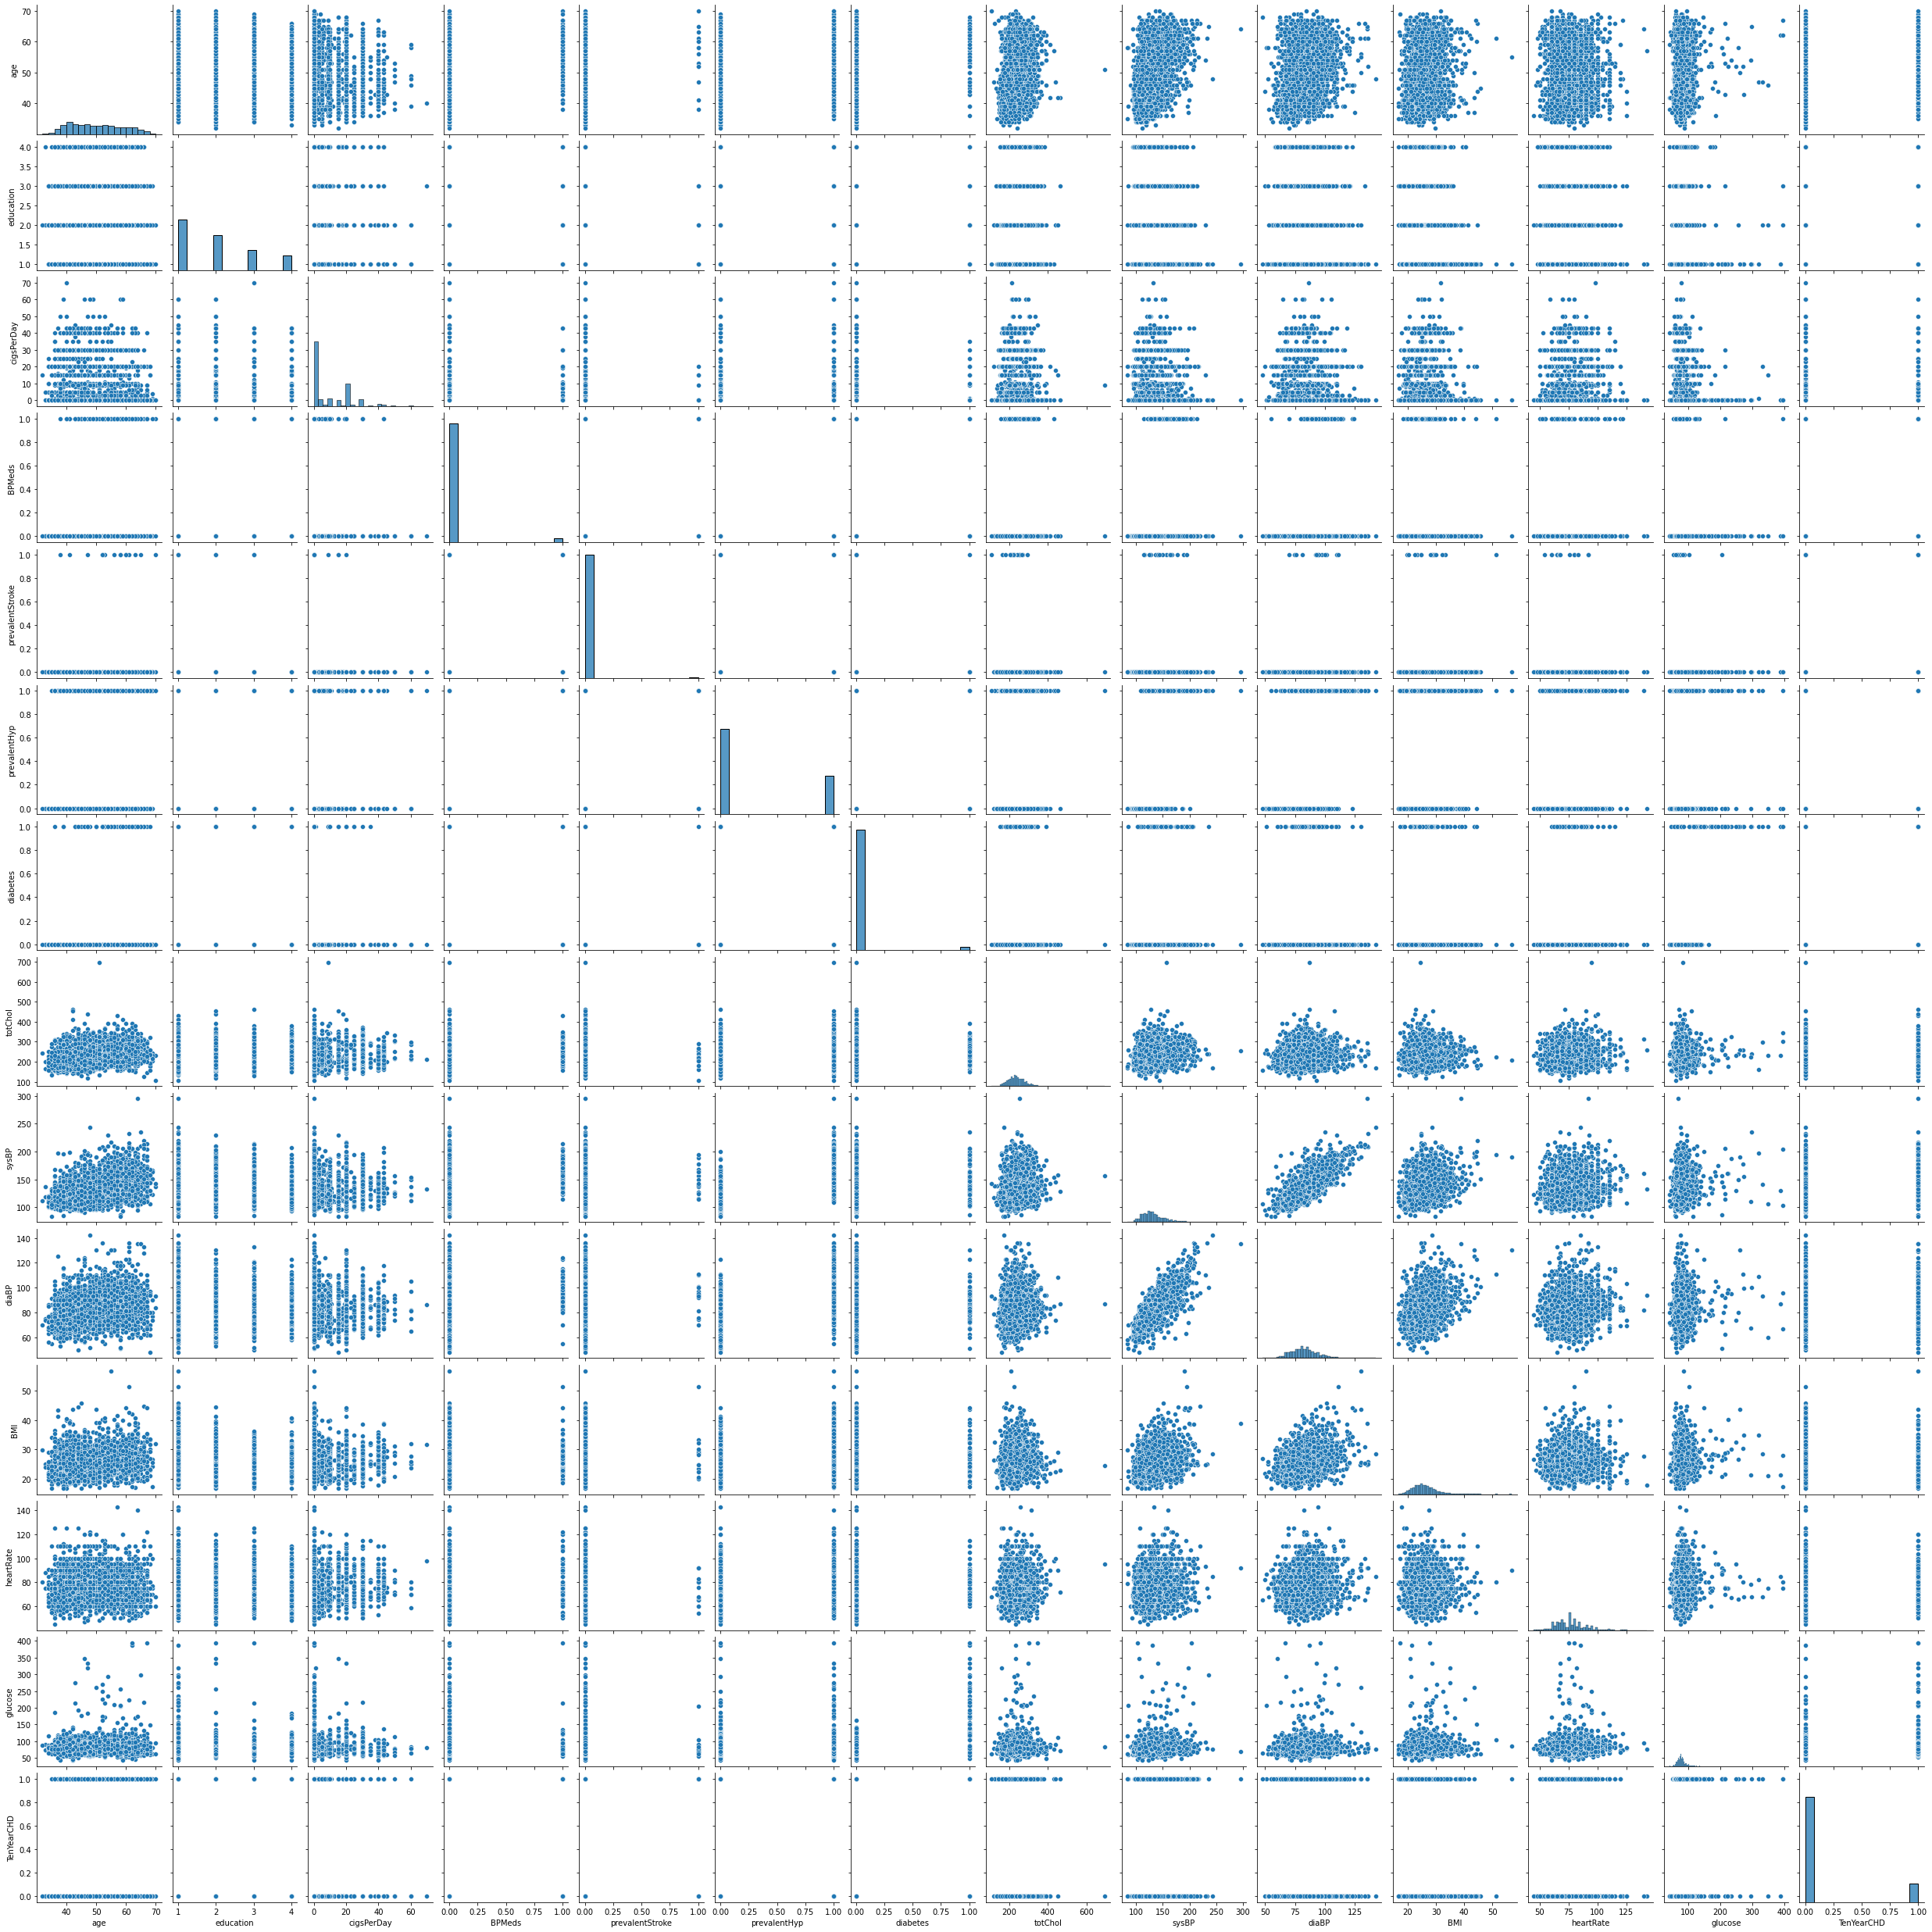

In [ ]:
sns.pairplot(train_data)
plt.show()

Box Plot and Dist plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


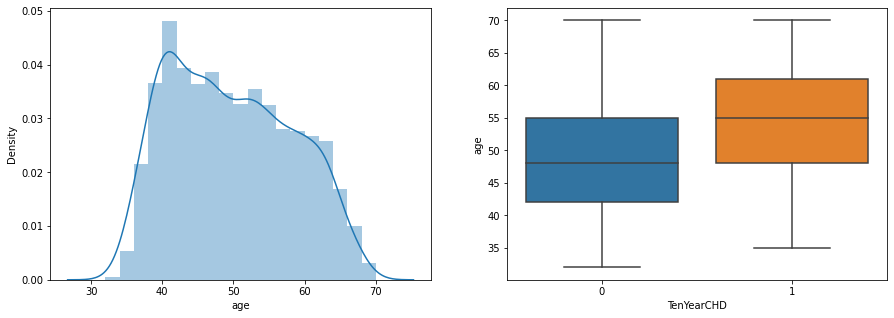

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['age'], ax=axes[0])
sns.boxplot(y='age',x='TenYearCHD',data=train_data, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


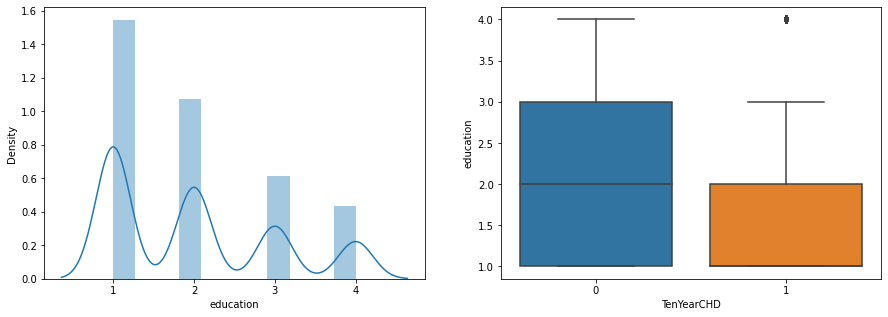

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['education'], ax=axes[0])
sns.boxplot(y='education',x='TenYearCHD',data=train_data, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


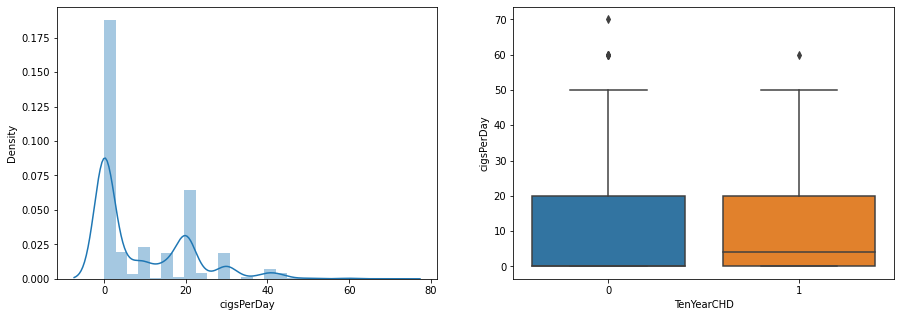

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['cigsPerDay'], ax=axes[0])
sns.boxplot(y='cigsPerDay',x='TenYearCHD',data=train_data, ax=axes[1])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


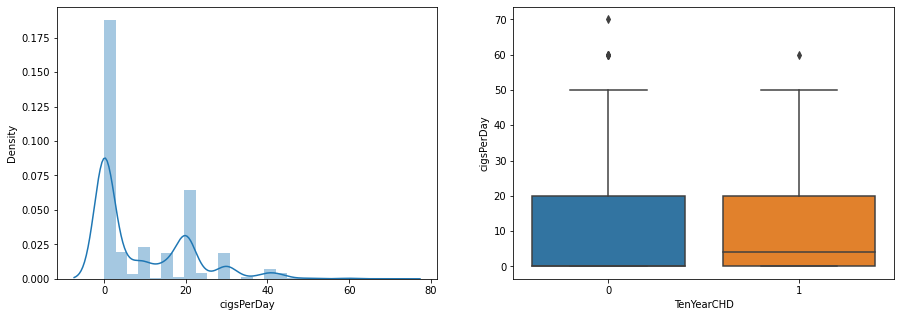

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['cigsPerDay'], ax=axes[0])
sns.boxplot(y='cigsPerDay',x='TenYearCHD',data=train_data, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


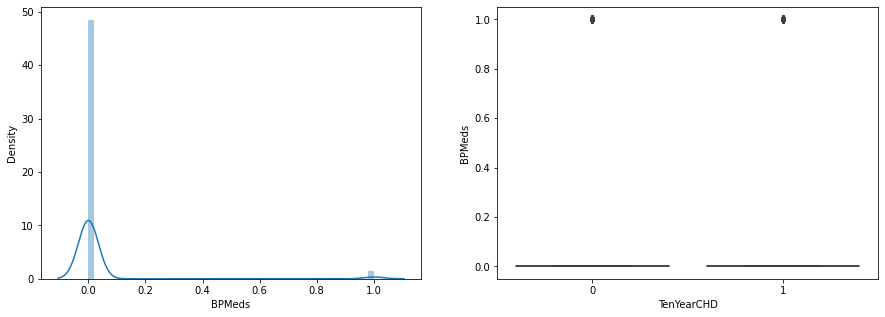

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['BPMeds'], ax=axes[0])
sns.boxplot(y='BPMeds',x='TenYearCHD',data=train_data, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


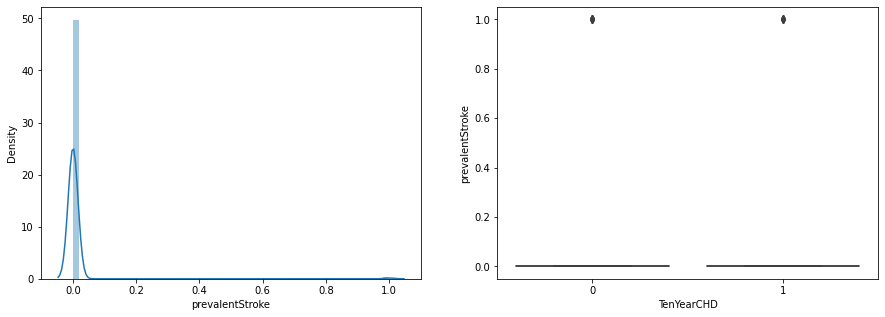

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['prevalentStroke'], ax=axes[0])
sns.boxplot(y='prevalentStroke',x='TenYearCHD',data=train_data, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


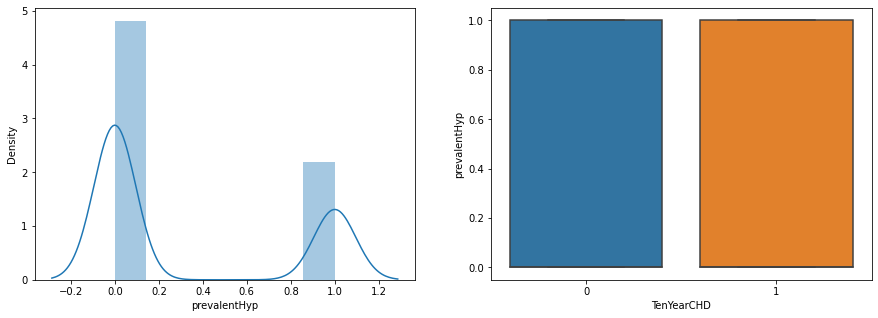

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['prevalentHyp'], ax=axes[0])
sns.boxplot(y='prevalentHyp',x='TenYearCHD',data=train_data, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


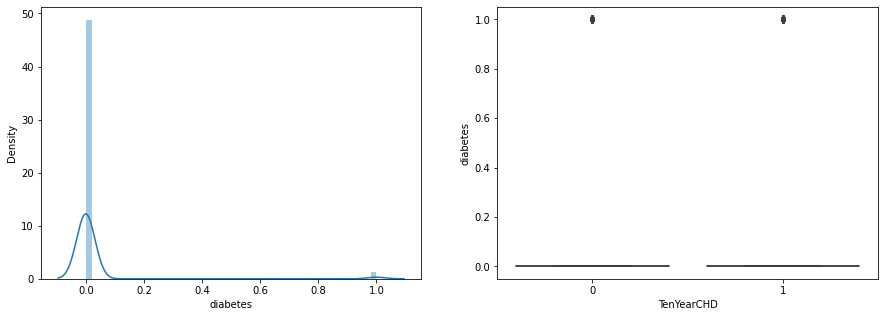

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['diabetes'], ax=axes[0])
sns.boxplot(y='diabetes',x='TenYearCHD',data=train_data, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


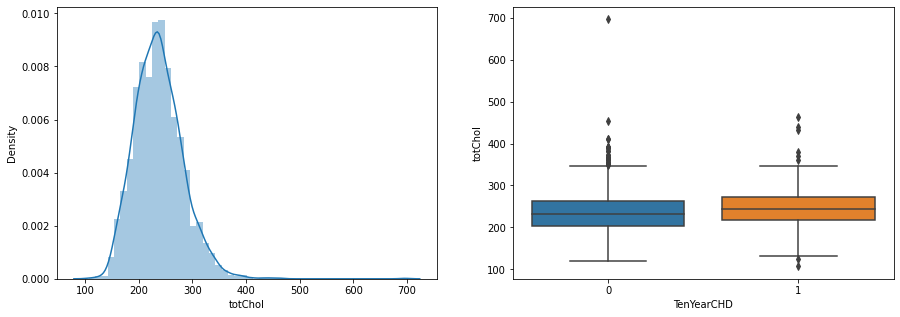

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['totChol'], ax=axes[0])
sns.boxplot(y='totChol',x='TenYearCHD',data=train_data, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


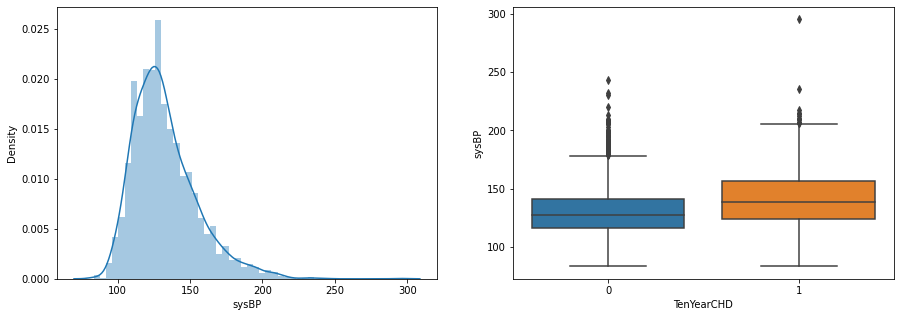

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['sysBP'], ax=axes[0])
sns.boxplot(y='sysBP',x='TenYearCHD',data=train_data, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


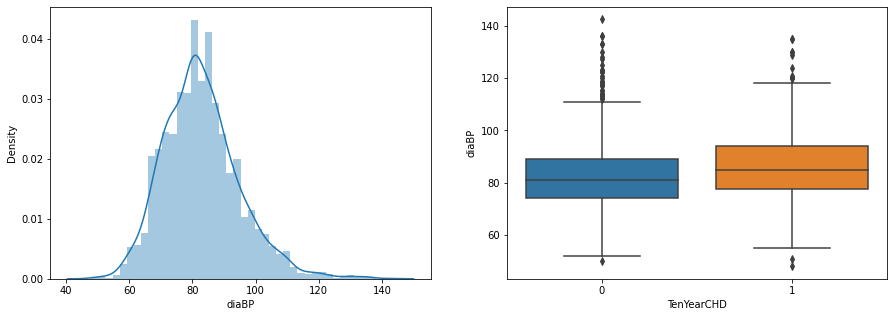

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['diaBP'], ax=axes[0])
sns.boxplot(y='diaBP',x='TenYearCHD',data=train_data, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


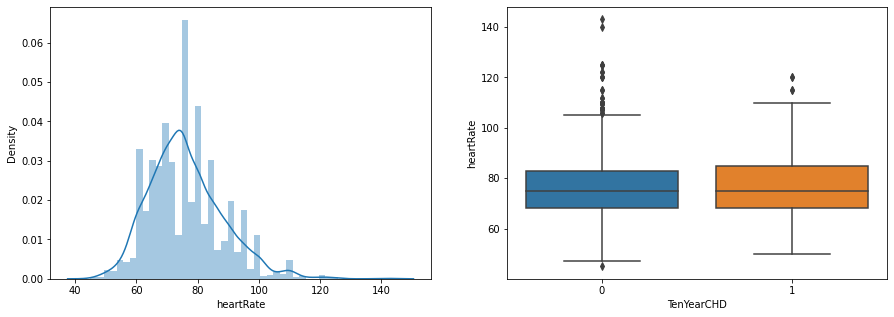

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['heartRate'], ax=axes[0])
sns.boxplot(y='heartRate',x='TenYearCHD',data=train_data, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


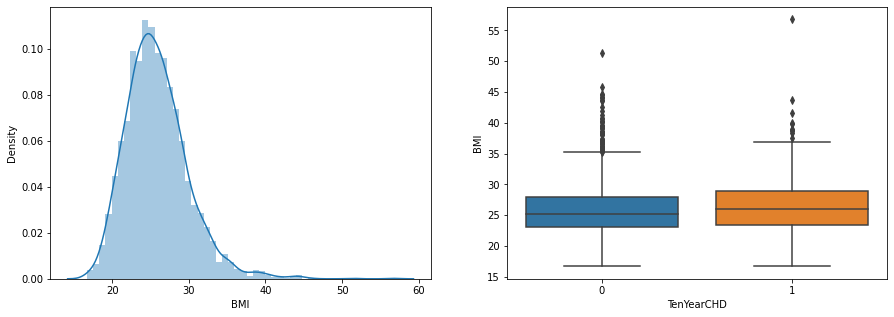

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['BMI'], ax=axes[0])
sns.boxplot(y='BMI',x='TenYearCHD',data=train_data, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


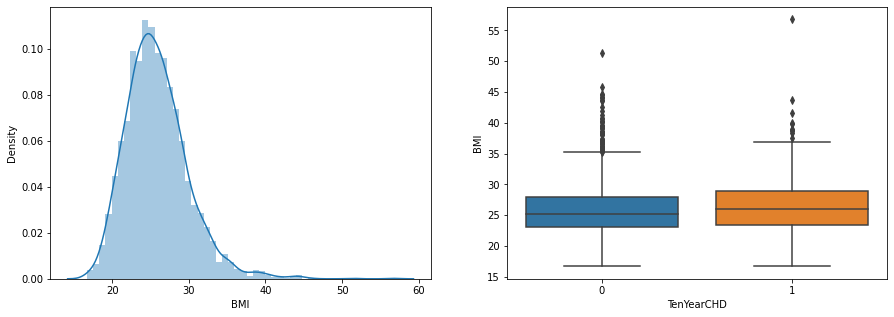

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['BMI'], ax=axes[0])
sns.boxplot(y='BMI',x='TenYearCHD',data=train_data, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


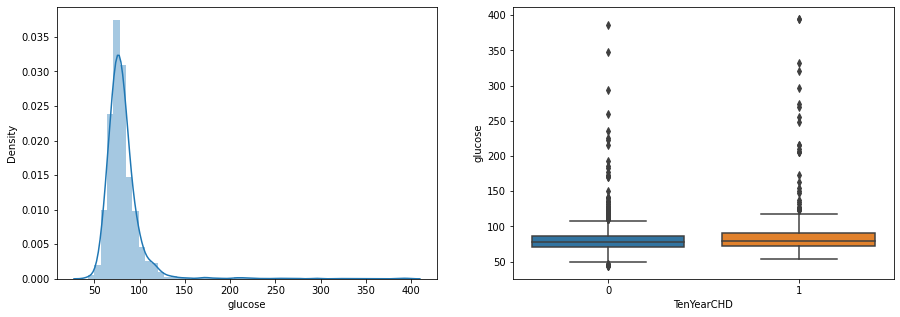

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['glucose'], ax=axes[0])
sns.boxplot(y='glucose',x='TenYearCHD',data=train_data, ax=axes[1])

In [ ]:
#find out NaN value or Null value
train_data.isna().sum()

age                  0
education           69
sex                  0
is_smoking           0
cigsPerDay          17
BPMeds              33
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             31
sysBP                0
diaBP                0
BMI                 11
heartRate            1
glucose            239
TenYearCHD           0
dtype: int64

Glucose having large missing value

In [ ]:
#total percentage of missing data
Null_Value=train_data.isna().sum()
Total_Null_Value=sum(Null_Value)
Total_Null_Value
print(f'Percentage of Total  missing value of data set is',Total_Null_Value*100/len(data['age']) ,'%')
print(f'Percentage of  missing value in  a Glucose column   is',239*100/len(train_data['age']) ,'%')

Percentage of Total  missing value of data set is 11.828908554572271 %
Percentage of  missing value in  a Glucose column   is 8.812684365781712 %


In [ ]:
Total_Null_Value

401

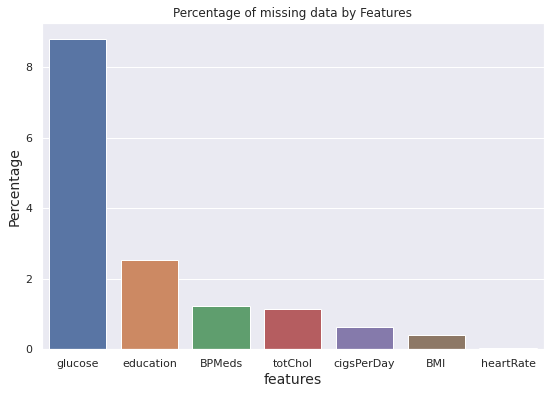

In [ ]:
# percentage of missing data per category
import seaborn as sns
total = train_data.isnull().sum().sort_values(ascending=False)
percent_total = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
Null_Value = missing[missing['Total']>0]
Null_Value
plt.figure(figsize=(9,6))
sns.set(style="darkgrid")
sns.barplot(x=Null_Value.index, y=Null_Value['Percentage'], data = Null_Value)
plt.title('Percentage of missing data by Features')
plt.xlabel('features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

In [ ]:
Null_Value

,Total,Percentage
glucose,239,8.812684
education,69,2.544248
BPMeds,33,1.216814
totChol,31,1.143068
cigsPerDay,17,0.626844
BMI,11,0.405605
heartRate,1,0.036873


The  glucose entry has the highest percentage of missing data i.e at 8.812552 % the rest have very few missing entries.

Since missing entries account for only 11.82 % of the total data we can impute these entries

In [ ]:
import statistics
print(f'median of glucose feature',train_data['glucose'].median())
print(f'mode of education feature',train_data['education'].mode())
print(f'mode of BPMeds',train_data['BPMeds'].mode())
print(f'median of totChol',train_data['totChol'].median())
print(f'median of cigsPerDay	',train_data['cigsPerDay'].median())
print(f'median of BMI',train_data['BMI'].median())
print(f'median of heartRate',train_data['heartRate'].median())

median of glucose feature 78.0
mode of education feature 0    1.0
dtype: float64
mode of BPMeds 0    0.0
dtype: float64
median of totChol 234.0
median of cigsPerDay	 0.0
median of BMI 25.38
median of heartRate 75.0


In [ ]:
train_data['glucose'] = train_data['glucose'].fillna(train_data['glucose'].median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_data['education'] = train_data['education'].fillna(train_data['education'].mode())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_data['BPMeds'] = train_data['BPMeds'].fillna(train_data['BPMeds'].mode())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_data['totChol'] = train_data['totChol'].fillna(train_data['totChol'].median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_data['cigsPerDay'] = train_data['cigsPerDay'].fillna(train_data['cigsPerDay'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_data['BMI'] = train_data['BMI'].fillna(train_data['BMI'].median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_data['heartRate'] = train_data['heartRate'].fillna(train_data['heartRate'].median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_data.isna().sum()

age                 0
education          69
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds             33
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

In [ ]:
 Target_variable = data['TenYearCHD'].value_counts()
 Target_variable

0    2879
1     511
Name: TenYearCHD, dtype: int64

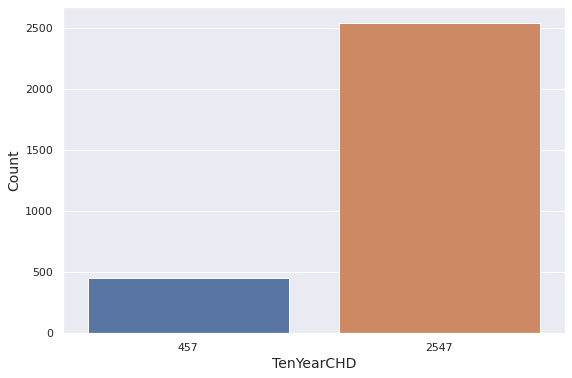

In [ ]:
plt.figure(figsize=(9,6))
sns.set(style="darkgrid")
sns.barplot(y= Target_variable.index, x= Target_variable[0:], data = Target_variable)
plt.xlabel('TenYearCHD', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

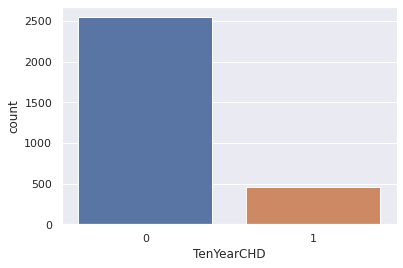

There are 2547 patients without heart disease and 457 patients with the disease


In [ ]:
#This is plot of TenYearCHD, So we can easily Visualize How much our data set is unbalnced.
sns.countplot(x='TenYearCHD',data=data)
plt.show()
cases = data.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

Now Clearly, data set  is Unbalanced  as you seen in this figure.

# ***`Data Visualization`***

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


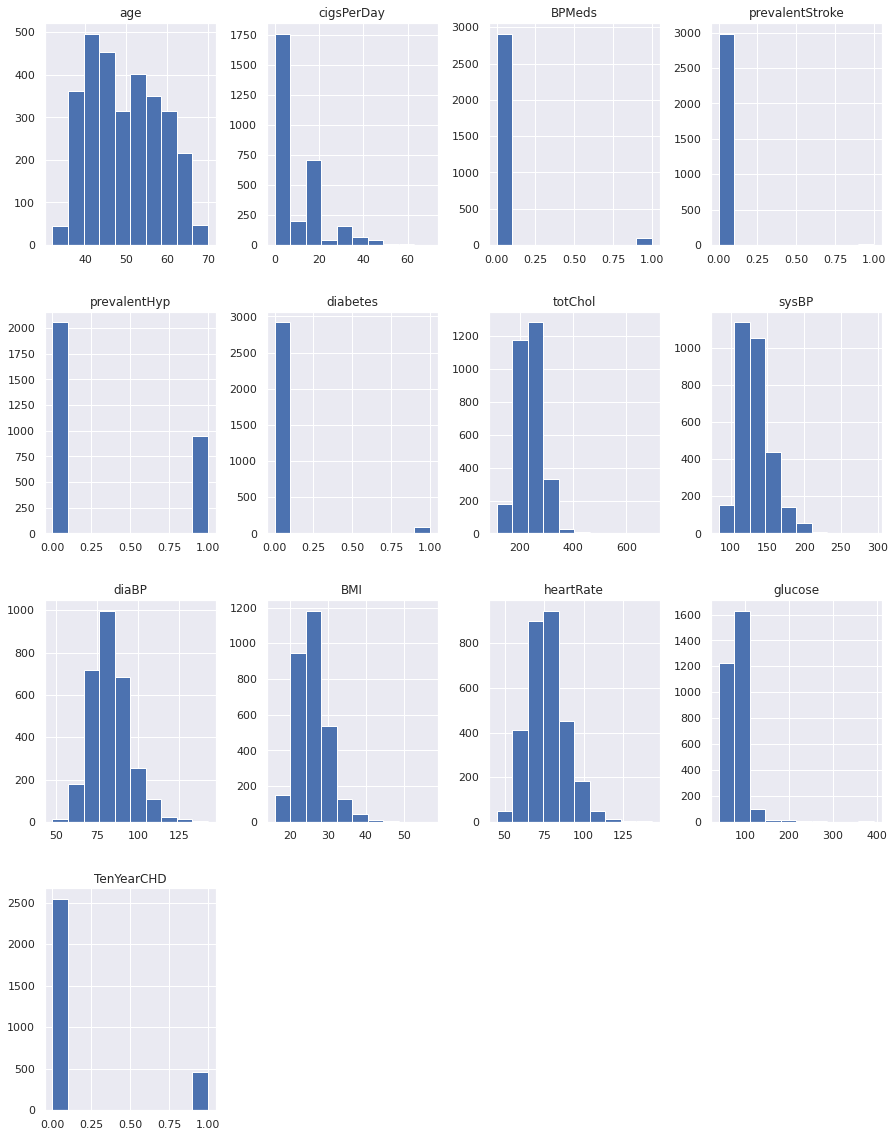

In [ ]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()